# Computing with word embeddings: essential methods and operations

| Author | Last update |
|:------ |:----------- |
| Hauke Licht (https://github.com/haukelicht) | 2023-09-24 |

This notebook illustrates how to use `gensim` to compute with word vectors (e.g., word2vec).

We'll cover how to

- compute two words similarity
- find the most similar words for a focal word
- solve analogy tasks

## Setup

Let's load modules we'll need throughout the notebook here.

**_Note:_** I asume you have follewed the setup instructions at https://github.com/haukelicht/advanced_text_analysis/tree/main/setup

In [3]:
# file in- and export
import os

# for working with word embeddings
import gensim

# for using arrays and data frames
import pandas as pd
import numpy as np

# for plotting
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## 1. Loading a pre-trained word2vec model

In this notebook, we will use a word2vec model that has been trained on the *Google News Corpus*.

It is downloadable from the internet and we use the `gensim` downloader API to do this.

In [4]:
# load a pre-trained word2vec model (shipped with gensim)
import gensim.downloader as api

# load the model and name it's instance in our notebook environment 'word2vec'
word2vec = api.load('word2vec-google-news-300')

**_Note:_** The above code will download the model (if not already done so) to the folder specified in `api.BASE_DIR`:

In [3]:
# show path
print(api.BASE_DIR)

# list files in folder
os.listdir(api.BASE_DIR)

/Users/hlicht/gensim-data


['word2vec-google-news-300', 'information.json']

### 1.1 Understanding the `word2vec` object

Let's inspect the **`word2vec`** object we have created so you understand how it's structured, and what **attributes** and **methods** it has.

The word embedding model is an instance of the `gensim.models.keyedvectors.KeyedVectors'` class.

In [4]:
print(type(word2vec))

<class 'gensim.models.keyedvectors.KeyedVectors'>


You can view the documentation with `?gensim.models.keyedvectors.KeyedVectors`.

In [5]:
# list all attributes
list(word2vec.__dict__.keys())

['vector_size',
 'index_to_key',
 'next_index',
 'key_to_index',
 'vectors',
 'norms',
 'expandos',
 'mapfile_path',
 'lifecycle_events']

The most relevant attributes are

- `vector_size`: number of dimensions of embeddings 
- `index_to_key`: pyhton dictionary mapping indexes in the embedding matrix to their token strings ("keys")
- `key_to_index`: inverse of `index_to_key``
- `vectors`: 2-dimensional `numpy` array recording word embeddings


In [6]:
word2vec.vectors.shape  # shape (vocabulary size, embedding dimensionality)

(3000000, 300)

### 1.2 Essential methods available for `KeyedVectors` objects

`gensim`'s  `KeyedVectors` class comes with a lot of useful pre-defined methods.

Let's start with different ways of accessing a word's embedding.

#### Accessing a word's embedding

In [7]:
# OPTION 1: directly index the object with a string value
print(word2vec['good'][:10]) # <== look only at first 10 dimensions
len(word2vec['good'])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375]


300

In [8]:
# OPTION 2: use the get_vector() method
word2vec.get_vector('good')[:10]

array([ 0.04052734,  0.0625    , -0.01745605,  0.07861328,  0.03271484,
       -0.01263428,  0.00964355,  0.12353516, -0.02148438,  0.15234375],
      dtype=float32)

#### Finding where a word's embedding is located

`word2vec.key_to_index` maps the "words" (tokens) in the model's vocabulary to their index position in the emebdding matrix.

In [9]:
word2vec.key_to_index

{'</s>': 0,
 'in': 1,
 'for': 2,
 'that': 3,
 'is': 4,
 'on': 5,
 '##': 6,
 'The': 7,
 'with': 8,
 'said': 9,
 'was': 10,
 'the': 11,
 'at': 12,
 'not': 13,
 'as': 14,
 'it': 15,
 'be': 16,
 'from': 17,
 'by': 18,
 'are': 19,
 'I': 20,
 'have': 21,
 'he': 22,
 'will': 23,
 'has': 24,
 '####': 25,
 'his': 26,
 'an': 27,
 'this': 28,
 'or': 29,
 'their': 30,
 'who': 31,
 'they': 32,
 'but': 33,
 '$': 34,
 'had': 35,
 'year': 36,
 'were': 37,
 'we': 38,
 'more': 39,
 '###': 40,
 'up': 41,
 'been': 42,
 'you': 43,
 'its': 44,
 'one': 45,
 'about': 46,
 'would': 47,
 'which': 48,
 'out': 49,
 'can': 50,
 'It': 51,
 'all': 52,
 'also': 53,
 'two': 54,
 'after': 55,
 'first': 56,
 'He': 57,
 'do': 58,
 'time': 59,
 'than': 60,
 'when': 61,
 'We': 62,
 'over': 63,
 'last': 64,
 'new': 65,
 'other': 66,
 'her': 67,
 'people': 68,
 'into': 69,
 'In': 70,
 'our': 71,
 'there': 72,
 'A': 73,
 'she': 74,
 'could': 75,
 'just': 76,
 'years': 77,
 'some': 78,
 'U.S.': 79,
 'three': 80,
 'million': 81

So an alternative way to access a word's embedding is 

1. using the model's `key_to_index` attribute to lookup a word's index in the embedding matrix, and
2. index the model's embedding matrix accordingly

In [10]:
idx = word2vec.key_to_index['good']
print(idx)
word2vec.vectors[idx][:10] # <== just print first 10 dimensions

127


array([ 0.04052734,  0.0625    , -0.01745605,  0.07861328,  0.03271484,
       -0.01263428,  0.00964355,  0.12353516, -0.02148438,  0.15234375],
      dtype=float32)

### 1.3 Visualizing word vectors

Since word embeddings have too many dimensions to display their locations, we usually apply dimensionality reduction techniques.

In this notebook, we'll simply rely on *Principal Component Analysis* (PCA).
Belo is some code that illustrates this.

**_Note:_** There are better options like UMAP or t-SNE that do a better job in preserving relative distances between data points when reducing dimensionality.



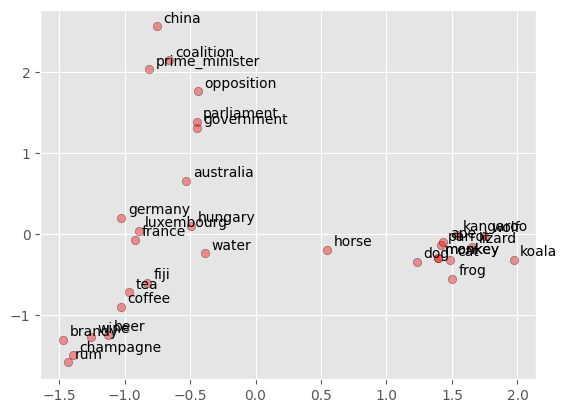

In [11]:
words = [
    # beverages
    'coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
    # animals
    'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard', 'frog', 'monkey', 'ape', 'kangaroo', 'wolf',
    # countries
    'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
    # institutions
    'parliament', 'government', 'opposition', 'coalition', 'prime_minister', 'minister',
]

X = np.array([word2vec[w] for w in words if w in word2vec.key_to_index])

pcs = PCA(n_components=2).fit_transform(X)

plt.scatter(pcs[:,0], pcs[:,1], c='r', edgecolors='k', alpha=.4)
for word, (x, y) in zip(words, pcs):
    plt.text(x+0.05, y+0.05, word)

## 2. Essential computations

In the next subsections, we will learn how use `gensim`'s `KeyedVectors` objects to 

1. compute similarities, 
2. find nearest neighbors, and 
3. solve analogy tasks.

**_Note:_** 
We will only go through the methods that will be required to complete exercises in our course.
Visit Radim Řehůřek's [summary](https://radimrehurek.com/gensim/models/keyedvectors.html) for a more comprehensive overview of available methods with excellent examples.


### 2.1 Computing similarities


An central quantity of interest in the study of lexical semantics (i.e., the "meaning" of words) is **word similarity** &mdash; how similar the "meanings" of two words are.

In CSS studies using word embeddings, computating similarities is often an essential computation step.

#### Intuition

In the embedding space, we can **measure two word vectors' similarity** of by their **_angle_**: the extent to which they *point in similar directions* relative to the coordiante origin $(0, 0, \ldots, 0)$.

Say you stand at the origin of a $d$-dimensional coordinate system.
Then asking whether two vectors $\mathbf{u}$ and $\mathbf{v}$ are similar is the same as asking: 

> "Would I end up in a similar location if I follow the direction of vector $\mathbf{u}$ rather than $\mathbf{v}$?"

The answer to this question aligns with the magnitude of the angle:

- If the two vectors are very similar, you'd end up in a similar location (e.g., $\mathbf{u} = [1, 1]$ and $\mathbf{u} = [.8, .9]$)
- If they are pointing in completely opposite directions, you'll end up on the other "side" of the vector space if you follow $\mathbf{u}$ rather than $\mathbf{v}$ (e.g., (e.g., $\mathbf{u} = [1, 1]$ and $\mathbf{u} = [-1, -1]$)

#### Illustration

The below plot visually illustrates this, given the following vectors (i.e., 2D points):

In [5]:
vecs = [
    [ 1.0,  1.0], # vector a
    [ 0.8,  0.9], # vector b
    [ 0.5,  .2],  # vector c
    [-1.0,  1.0], # vector d
    [-1.0, -1.0], # vector e
]
vecs = np.array(vecs)
vecs

array([[ 1. ,  1. ],
       [ 0.8,  0.9],
       [ 0.5,  0.2],
       [-1. ,  1. ],
       [-1. , -1. ]])

/var/folders/_c/cm0nk6y92rz2l6ct3npgw9tr0000gn/T/ipykernel_67815/2509351183.py:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate(


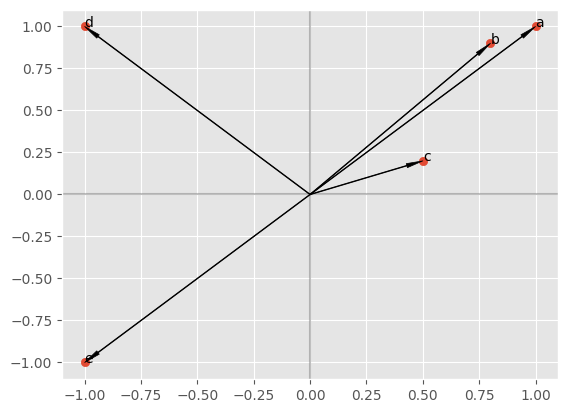

In [10]:
# plot vectors' values on 1st and 2nd dimension on x and y axes
plt.scatter(vecs[:,0], vecs[:,1])

# add vertical and horizontal coordinate lines running through (0, 0) to the plot
plt.axvline(0, c='grey', alpha=.5)
plt.axhline(0, c='grey', alpha=.5)

# draw lines from the coordinate origin (0, 0) to each point
vec_names = ['a', 'b', 'c', 'd', 'e']
for i, vec in enumerate(vecs):
    plt.annotate(
        '', # no text
        xy=vec, # end point of the line
        xytext=(0, 0), # start point of the line
        arrowprops=dict(facecolor='black', color='black', width=.5, headwidth=3) # arrow style
    )
    plt.text(vec[0], vec[1], f'{vec_names[i]}')

plt.show()


So in this example,

- $\mathbf{a}$ and $\mathbf{b}$ are very similar (because they point in a similar direction)
- $\mathbf{a}$ and $\mathbf{c}$, and $\mathbf{b}$ and $\mathbf{c}$ are also still somewhat similar
- $\mathbf{a}$ and $\mathbf{d}$ are orthorgonal ("unrelated"), and
- $\mathbf{a}$ and $\mathbf{e}$ are maximally dissimilar (because they point in opposite directions)

#### Math

The extent to which they point in similar directions relative to the coordiante origin $(0, 0,
 \ldots, 0)$ can be measured by the **cosine similarity**:

$$
\text{Cosine Similarity} = \frac{{\mathbf{u} \cdot \mathbf{v}}}{{\| \mathbf{u} \| \times \| \mathbf{v} \|}}
$$


$\mathbf{u}$ and $\mathbf{v}$ are the vectors whose similarity is being measured.

- the *numerator* (top) measures the similarity of 
- the *denominator* (bottom) normalizes ("rescales") the similarity measure to range between -1 and 1 

The $\boldsymbol{\cdot}$ operator denotes the **dot product** of two vectors. 
It measures the *similarity in the direction of two vectors.*
(Think of vectors as directions from the origin $(0, 0, \ldots, 0)$).

- The dot product is computed as the sum of the element-wise products of vectors' entries: 
$$
\mathbf{u} \cdot \mathbf{v} = \sum\limits_{i=1}^{d} u_i \times v_i
$$
- $u_i \times v_i$ is high if the two entries are similar (point in the same directio nrelative to the coordinate origin $0$)
- Thus, $\mathbf{u} \cdot \mathbf{v}$ is the higher, the more of their $(u_i, v_i)$ elements are similar.

$\| \mathbf{u} \|$ and $\| \mathbf{v} \|$ represent the **Euclidean norms** (magnitudes) of vectors $\mathbf{u}$ and $\mathbf{v}$.
The magnitude (or length) of a vector measures its *distance from the origin in the  $d$-dimensional space.*
It is computed as 

$$
\| \mathbf{x} \| = \sqrt{ \sum\limits_{i=1}^{d} x_i^2}
$$

Having the $\| \mathbf{u} \| \times \| \mathbf{v} \|$ in the denominator if the cosine similarity function makes the metric scale invariant (i.e., insensitive to the lengths/magnitudes of $\mathbf{u}$ and $\mathbf{v}$).

#### Code (from scratch)

In [6]:
# define a function to compute the cosine similarity between two word vectors
import numpy as np

def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similariy between u and v
    
    Arguments:
        u -- a word vector of shape (n,)
        v -- a word vector of shape (n,)
    
    Returns:
        cosine_similarity -- the cosine similarity between u and v
    """
    
    # compute the dot product between u and v
    dot = np.dot(u, v)
    
    # compute the Euclidean norm of u
    norm_u = np.sqrt(np.sum(np.square(u)))
    # compute the Euclidean norm of v
    norm_v = np.sqrt(np.sum(np.square(v)))
    
    # divide the dot product by the product of the L2 norms
    cosine_similarity = dot / (norm_u * norm_v)
    
    return cosine_similarity

**_Note:_** We implement our own `cosine_similarity` function here to map code to math. Below and in other notebooks, we'll use the `cosine` function from the `scipy.spatial.distance` module.

Let's compute similarties for vectors $\mathbf{b}$-$\mathbf{e}$ in `vecs` to vector $\mathbf{a}$:

In [15]:
for i in range(1, vecs.shape[0]):
    s = cosine_similarity(vecs[0], vecs[i])
    print(f"a = {vecs[0]}, {vec_names[i]} = {vecs[i]}, cos(a, {vec_names[i]}) = {s:+0.3f}")

a = [1. 1.], b = [0.8 0.9], cos(a, b) = +0.998
a = [1. 1.], c = [0.5 0.2], cos(a, c) = +0.919
a = [1. 1.], d = [-1.  1.], cos(a, d) = +0.000
a = [1. 1.], e = [-1. -1.], cos(a, e) = -1.000


**_Note:_** inside `print` above we use python's string formatting syntax to directly insert the variable values we want to print.
It works like this:

Let's apply the same function to compute the similarity of two words in our `word2vec` embeddings:

compute cosine similarity for two word vectors in our embedding model:

In [16]:
cosine_similarity(word2vec['good'], word2vec['bad'])

0.7190051

**_Note:_** `scipy` implements the cosine distiance metric for us ;)

In [17]:
from scipy.spatial.distance import cosine

1-cosine(word2vec['good'], word2vec['bad'])

0.7190051674842834

#### Code (using `gensim``)

But our `word2vec` instance of `gensim`'s `KeyedVectors` class also comes with a built-in method to compute two words' similarity:

In [18]:
# compute the cosine similarity between two word embeddings in the word2vec object
word2vec.similarity('good', 'bad')

0.7190051

#### Exercise 👩‍💻

Let's have our first few little exercises.
Go to the **_exercise_ notebook** corresponding to this notebook here.

### 2.2. Finding most similar terms (nearest neighbors)


Since word vectors capture similarities in words co-occurence patterns, their locations in the embedding space can be use to find lists of semantically and functionally similar words.

#### Intuition

In the embedding space, searching for similar words for a focus word *w* can be implemented as [*nearest neighbors* search](https://en.wikipedia.org/wiki/Nearest_neighbour_algorithm) because words pairs' distances measure their similarity.

#### Illustration

Let's use the same 2-dimensional vectors as in the example above.

In [11]:
vecs = [
    [ 1.0,  1.0], # vector a
    [ 0.8,  0.9], # vector b
    [ 0.5,  .2],  # vector c
    [-1.0,  1.0], # vector d
    [-1.0, -1.0], # vector e
]
vecs = np.array(vecs)

/var/folders/_c/cm0nk6y92rz2l6ct3npgw9tr0000gn/T/ipykernel_67815/3037347475.py:7: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate(


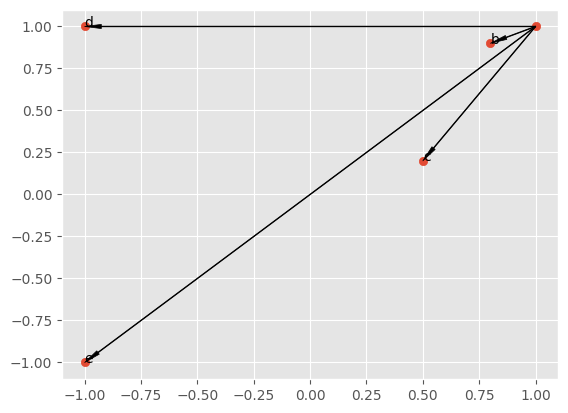

In [12]:
# plot vectors' values on 1st and 2nd dimension on x and y axes
plt.scatter(vecs[:,0], vecs[:,1])

# draw lines from the coordinates of vector a to vectors b, c, d, and e
vec_names = ['b', 'c', 'd', 'e']
for i, vec in enumerate(vecs[1:]):
    plt.annotate(
        '', # no text
        xy=vec, # end point of the line
        xytext=vecs[0], # start point of the line
        arrowprops=dict(facecolor='black', color='black', width=.5, headwidth=3) # arrow style
    )
    plt.text(vec[0], vec[1], f'{vec_names[i]}')

plt.show()

#### Code

So we can find out what's the most similar vector to $\mathbf{a}$ by 

1. computing all vectors ($\mathbf{b}$-$\mathbf{e}$) similarity with $\mathbf{a}$, and 
2. selecting the one with the highest similarity among them

In [13]:
sims = {nm: cosine_similarity(vecs[0], vec) for nm, vec in zip(vec_names, vecs[1:])}
print(sims)

# get name of most similar values (by sorting)
print([nm for nm, s in sorted(sims.items(), key=lambda item: item[1], reverse=True)][0])

# same with numpy
vec_names[np.array(sims.values).argmax()]

{'b': 0.9982743731749959, 'c': 0.9191450300180576, 'd': 0.0, 'e': -0.9999999999999998}
b


'b'

Again, `gensim`'s `KeyedVectors` class provides dedicated methods for nearest neighbors-based similar word search:

In [16]:
# show the five most similar words to 'love'
word2vec.most_similar('loaf', topn=5)

[('baguette', 0.6257901191711426),
 ('loaves', 0.6203072667121887),
 ('bread', 0.6184972524642944),
 ('marble_rye', 0.5983655452728271),
 ('###g_loaf', 0.5870223045349121)]

**_Note:_** The `most_similar()` method returns a list of tuples.
Each tuple is a pair of word and cosine similarity score.

Interestingly, among the five terms most similar to 'love', there is also it's [*antonym*](https://en.wikipedia.org/wiki/Opposite_(semantics)) 'hate' (i.e., opposite word).

This illustrates that "similar" in the context of word embeddings does *not* necessarily mean [*synonym*](https://en.wikipedia.org/wiki/Synonym) (i.e.. equal in meaning).
Instead, word embeddings capture a wide range of lexical semantic relations

- synonyms
- antonyms
- hypo- and hypernym relations (subtyoe relations): https://en.wikipedia.org/wiki/Hyponymy_and_hypernymy
- mero- and hoponym relations (part-of relations): https://en.wikipedia.org/wiki/Meronymy_and_holonymy

#### Exercise 👩‍💻

Let's tackle a second set of exercises.
Go to the **_exercise_ notebook** corresponding to this notebook here.

### 2.3. Computing centroids

Just as we use keywords in dictionaries to indicate concepts (e.g., positive affect), 
we can use bags of word vectors to "locate" concepts in the embedding space.

Because each indicator word's embedding might caputure a concept only partially, researchers often **average multiple words' embeddings into _centroids_**.

This is as simple as computing the mean of vectors value for each embedding dimension.
And since word vectors in `gensim` are just numpy arrays, it takes no more than two lines of code:

In [23]:
# take example of words used to indicate concept 'positive sentiment'
positive_sentiment_words = [
    'glad',
    'pleased',
    'ecstatic',
    'overjoyed',
    'thrilled',
    'satisfied',
    'proud',
    'delighted',
    'excited',
    'elated',
    'thankful',
    'enthused',
    'chuffed',
    'grateful',
    'confident',
]

# get word vectors for words in list
vecs = [word2vec[w] for w in positive_sentiment_words]
# average them dimension-wise
centroid = np.average(vecs, axis=0)

# this results in a single 300-dimensional vector
centroid.shape

(300,)

In [24]:
# there is again a pre-implemented method
centroid = word2vec.get_mean_vector(keys=positive_sentiment_words)

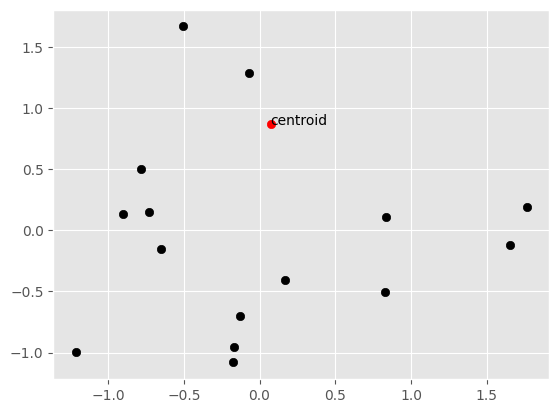

In [25]:
# combine original values with centroid
vecs.append(centroid)

# reduce embeddings to 2 dimensions
X = np.array(vecs)
pcas = PCA(n_components=2).fit_transform(X)

# plot
plt.scatter(pcas[:-1,0], pcas[:-1,1], c='black')
plt.scatter(pcas[-1,0], pcas[-1, 1], c='red')
plt.text(pcas[-1,0], pcas[-1, 1], 'centroid')
plt.show()

#### Excurse: Using centroids to finding mismatching terms (the "odd one out")

We can use centroids to find the most mismatching term in a lits of terms.

For this, we 

1. compute the centroid of all  but the focus term's embeddings,
2. compute the similarity of the focus term's embedding and the centroids,
3. repeat this leave-one-out procedure for all terms, and
4. label the one with the lowest to-centroid similarity as 'mismatching'

In [26]:
terms = [
    'cat',
    'dog',
    'hamster',
    'flower',
    'table'
]

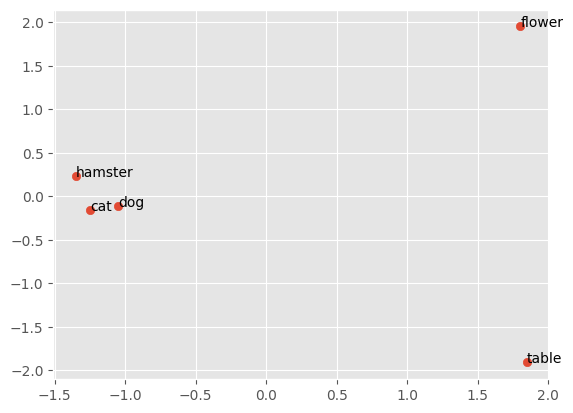

In [27]:
# apply a principal component analysis to visualize
X = np.array([word2vec[w] for w in terms])
pcs = PCA(n_components=2).fit_transform(X)
plt.scatter(pcs[:,0], pcs[:,1])
# label the points
for i, (x, y) in enumerate(pcs):
    plt.text(x, y, f'{terms[i]}')


In [28]:
# for one term
c = np.average([word2vec[w] for w in terms[:-1]], axis=0)
terms[-1], cosine_similarity(c, word2vec[terms[-1]])

('table', 0.11400653)

In [29]:
# for all terms
sims = list()
for term in terms:
    c = np.average([word2vec[w] for w in terms if w != term], axis=0)
    s = cosine_similarity(c, word2vec[term])
    sims.append(s)
print(sims)

# find index of lowest value
odd_one_out = terms[np.argmin(sims)]
print(f"the mismatching term is: '{odd_one_out}'")

[0.6643747, 0.6265888, 0.52130747, 0.23308133, 0.11400653]
the mismatching term is: 'table'


Luckily, `gensim`'s `KeyedVectors` class again provides dedicated methods for nearest neighbors-based similar word search:

In [30]:
word2vec.doesnt_match(terms)

'table'

### 2.4. Solving analogies



"Well-behaved" word embeddings exhibit the ability to automate much more complex tasks than finding sysnonyms, antonyms, and mismatching terms.

One of word2vec's powers that has attracted a lot of attention when Tomas Mikolov *et al.* released  it ten years ago was their ability to solve analogy tasks.

**Analogy tasks** are simple national language inference problems that prompt a model to infer the Y2 in the following relational statement: 

> X1 is to Y1 as X2 is to Y1.

For example, a frequently cited analogy problem is,

> Man is to woman as king is to _____?

#### Intuition

One can solve analogy problems with word embeddings by performing applying the following geometric operations:

1. View the statement ` X1 is to Y1 ` as an instruction to move from the location of X1 in the direction of Y1.
2. To get to Y2, take the same direction but start from X2.

The following figure from [Jurafsky & Martin (2023)](https://web.stanford.edu/~jurafsky/slp3/6.pdf) illustrates this idea for the analogy "apple is to tree as grape is to vine:" 

![](./imgs/analogy_problem_jurafsky.png)

#### Math

Let's take the analogy problem

> man is to woman as king is to _____?

This can be "solved" by computing with word vectors by performing
the following arithmetic operation with the word vectors of, king, man, and woman:

\begin{align}
\mathbf{v}_\text{man} - \mathbf{v}_\text{woman} &\approx \mathbf{v}_\text{king} - \mathbf{v}_\text{?}\\

\mathbf{v}_\text{king} - \mathbf{v}_\text{man} + \mathbf{v}_\text{woman} &\approx \mathbf{v}_\text{?}
\end{align}

The **closest word vector to** $\mathbf{v}_\text{?}$ is the best model's best guess for completing the analogy problem.

This works because

- the operation $(\mathbf{v}_\text{woman} - \mathbf{v}_\text{man})$ spans a "gender dimension": $\mathbf{v}_\text{gender}$
- adding $\mathbf{v}_\text{gender}$ to $\mathbf{v}_\text{king}$ means to depart from 'king' and move along the gender dimension into the direction of "femininity"

(see Kozlowski et al., 2019, p. 912, for further examples)


#### Code (from scratch)

In [31]:
v_king = word2vec['king']
v_man = word2vec['man']
v_woman = word2vec['woman']

v_q = v_king - v_man + v_woman

word2vec.similar_by_vector(v_q, topn=5)

[('king', 0.8449392318725586),
 ('queen', 0.7300516366958618),
 ('monarch', 0.6454660296440125),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676948547363)]

#### Code (with `gensim`)

In [32]:
word2vec.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133)]

I find the order in which you need to pass the words to the `positive` and `negative` arguments slightly unintuitive, though.
So let's define a wrapper function:

In [33]:
def analogy(x1='man', y1='king', x2='woman', verbose=True):
    """Computes answer to query 'y1 is to x1 what WORD is to x2?'"""
    result = word2vec.most_similar(positive=[y1, x2], negative=[x1])
    if verbose:
        print(f"'{x1}' : '{y1}' :: '{x2}' : ?? ==> '{result[0][0]}'")
    return result[0][0]

In [34]:
analogy('man', 'king', 'woman')

'man' : 'king' :: 'woman' : ?? ==> 'queen'


'queen'